In [15]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.dataset as pads
import os

pd.set_option('display.max_columns', None)

labeled = pd.read_csv('all_labeled_plays.csv')
labeled

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,outs,let,cut_hold,cut_relay,optimal_action
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.3448,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,CGA-1824,CGA-1824,7.0,28.322210,27.656672,0.996948,1,3.028109,3.253,3.154036,let
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.1734,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,CGA-1353,CGA-1353,3.0,23.617302,22.445863,0.978368,1,0.564000,0.564,0.553682,cut_hold
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.0088,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,CGA-1929,CGA-1929,3.0,28.405855,27.655517,0.812507,1,1.563890,1.564,1.474566,cut_relay
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.4455,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,QEA-0252,QEA-0252,27.0,28.366512,24.333189,0.928305,0,2.802150,2.809,2.261331,cut_relay
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.7784,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,QEA-0249,QEA-0249,49.0,27.627580,26.671594,0.958351,2,0.273000,0.273,0.261630,cut_hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,y2_d094_QZE_RZQ,344,11857564,9,right field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0414,RZQ-0347,RZQ-0310,NaN,-106.7781,143.1831,66.1776,264.8085,233.5866,234.6720,20.2089,125.0232,-60.2076,60.5493,-13.8180,9.9936,233.1327,228.2667,-1.903200,0.063761,67.227633,12,2B,Home,True,True,-13.8180,9.9936,17.053128,233.5866,234.6720,331.109721,RZQ-0310,RZQ-0310,87.0,30.062055,28.691501,1.000000,2,2.514005,2.539,2.449613,cut_relay
1680,y2_d095_QZE_RZQ,97,2945498,7,left field,ball acquired,RZQ,QZE,bottom,QZE-2482,QZE-2394,

In [16]:
cuts = pd.read_csv('cutoff_decisions.csv')
with_obs = labeled.merge(cuts, on=['game_str', 'play_id'], how='left')
with_obs

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,outs,let,cut_hold,cut_relay,optimal_action,cutoff_man,cutoff_decision
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.3448,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,CGA-1824,CGA-1824,7.0,28.322210,27.656672,0.996948,1,3.028109,3.253,3.154036,let,second baseman,cut_relay
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.1734,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,CGA-1353,CGA-1353,3.0,23.617302,22.445863,0.978368,1,0.564000,0.564,0.553682,cut_hold,second baseman,cut_hold
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.0088,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,CGA-1929,CGA-1929,3.0,28.405855,27.655517,0.812507,1,1.563890,1.564,1.474566,cut_relay,shortstop,cut_hold
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.4455,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,QEA-0252,QEA-0252,27.0,28.366512,24.333189,0.928305,0,2.802150,2.809,2.261331,cut_relay,shortstop,cut_relay
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.7784,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,QEA-0249,QEA-0249,49.0,27.627580,26.671594,0.958351,2,0.273000,0.273,0.261630,cut_hold,second baseman,cut_hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,y2_d094_QZE_RZQ,344,11857564,9,right field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0414,RZQ-0347,RZQ-0310,NaN,-106.7781,143.1831,66.1776,264.8085,233.5866,234.6720,20.2089,125.0232,-60.2076,60.5493,-13.8180,9.9936,233.1327,228.2667,-1.903200,0.063761,67.227633,12,2B,Home,True,True,-13.8180,9.9936,17.053128,233.5866,234.6720,331.109721,RZQ-0310,RZQ-0310,87.0,30.062055,

In [17]:
# def assigned_base(cutoff_man):

#     mapping = {
#         'first baseman': '1B',
#         'second baseman': '2B',
#         'third baseman': '3B',
#         'shortstop': None,
#         'pitcher': None,
#         'catcher': 'Home'
#     }
#     return mapping.get(cutoff_man, None)

# mask = (with_obs['cutoff_decision'] == 'cut_hold') & (
#     with_obs['to_base'] == with_obs['cutoff_man'].map(assigned_base)
# )

# with_obs.loc[mask, 'cutoff_decision'] = 'cut and tag'
# # Find all (game_str, play_id) where the mask is True
# plays_to_update = with_obs.loc[mask, ['game_str', 'play_id']].drop_duplicates()

# # Update cutoff_decision for all rows in those plays
# for _, row in plays_to_update.iterrows():
#     idx = (with_obs['game_str'] == row['game_str']) & (with_obs['play_id'] == row['play_id'])
#     with_obs.loc[idx & (with_obs['cutoff_decision'] == 'cut_hold'), 'cutoff_decision'] = 'cut and tag'

# with_obs['cutoff_decision'].value_counts()

In [19]:
data_path = "/Users/pranavrajaram/SMT-Data-Challenge-2025"
def readDataSubset(table_type, data_path):
    """
    Loads a specified SMT data subset as a PyArrow dataset.
    """
    valid_tables = ['ball_pos', 'game_events', 'game_info', 'player_pos', 'rosters']
    if table_type not in valid_tables:
        print("Invalid data subset name. Please try again with a valid data subset.")
        return None

    if table_type == 'rosters':
        return pads.dataset(source=os.path.join(data_path, 'rosters.csv'), format='csv')
    else:
        
        return pads.dataset(
            source=os.path.join(data_path, table_type),
            format='csv'
        )

ball_pos_ds = readDataSubset('ball_pos', data_path)
player_pos_ds = readDataSubset('player_pos', data_path)

In [20]:
ball_pos_df = ball_pos_ds.to_table().to_pandas()
player_pos_df = player_pos_ds.to_table().to_pandas()

In [21]:
position_key = pd.DataFrame({
    "cut_code": [*range(1, 14), 255, 14, 15, 16, 17, 18, 19],
    "cut_position": [
        "pitcher", "catcher", "first baseman", "second baseman", "third baseman",
        "shortstop", "left field", "center field", "right field", "batter",
        "runner on first base", "runner on second base", "runner on third base",
        "ball event with no player (e.g., ball bounce)", "home plate umpire",
        "field umpire", "field umpire", "field umpire",
        "first base coach", "third base coach"
    ]
})

player_pos = player_pos_df.merge(
    position_key, left_on='player_position', right_on='cut_code', how='left').drop(
    columns=['player_position'])

player_pos

,game_str,play_id,timestamp,field_x,field_y,cut_code,cut_position
0,y1_d069_ACN_QEA,1,14853,0.6102,58.6314,1,pitcher
1,y1_d069_ACN_QEA,1,14853,1.7643,-6.4374,2,catcher
2,y1_d069_ACN_QEA,1,14853,69.9423,98.1246,3,first baseman
3,y1_d069_ACN_QEA,1,14853,37.2924,146.9091,4,second baseman
4,y1_d069_ACN_QEA,1,14853,-66.9441,86.1147,5,third baseman
...,...,...,...,...,...,...,...
76350334,y1_d058_WZR_YJD,330,12033008,94.1688,194.3637,9,right field
76350335,y1_d058_WZR_YJD,330,12033008,46.8339,87.3768,10,batter
76350336,y1_d058_WZR_YJD,330,12033008,-0.2910,120.6429,11,runner on first base
76350337,y1_d058_WZR_YJD,330,12033008,0.1224,-1.6680,12,runner on second base


In [22]:
everything_df = with_obs.merge(
    player_pos,
    left_on=['game_str', 'play_id', 'timestamp', 'cutoff_man'],
    right_on=['game_str', 'play_id', 'timestamp', 'cut_position'],
    how='left'
).rename(
    columns={
        'field_x': 'cutoff_x', 
        'field_y': 'cutoff_y'
    }
).drop(columns=['cut_position'])

everything_df

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,outs,let,cut_hold,cut_relay,optimal_action,cutoff_man,cutoff_decision,cutoff_x,cutoff_y,cut_code
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.3448,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,CGA-1824,CGA-1824,7.0,28.322210,27.656672,0.996948,1,3.028109,3.253,3.154036,let,second baseman,cut_relay,41.7405,194.3859,4
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.1734,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,CGA-1353,CGA-1353,3.0,23.617302,22.445863,0.978368,1,0.564000,0.564,0.553682,cut_hold,second baseman,cut_hold,25.8921,137.6235,4
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.0088,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,CGA-1929,CGA-1929,3.0,28.405855,27.655517,0.812507,1,1.563890,1.564,1.474566,cut_relay,shortstop,cut_hold,11.6007,132.4140,6
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.4455,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,QEA-0252,QEA-0252,27.0,28.366512,24.333189,0.928305,0,2.802150,2.809,2.261331,cut_relay,shortstop,cut_relay,-55.6794,140.5182,6
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.7784,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,QEA-0249,QEA-0249,49.0,27.627580,26.671594,0.958351,2,0.273000,0.273,0.261630,cut_hold,second baseman,cut_hold,18.4110,161.4603,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,y2_d094_QZE_RZQ,344,11857564,9,right field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0414,RZQ-0347,RZQ-0310,NaN,-106.7781,143.1831,66.1776,264.8085,233.5866,234.6720,20.2089,125.0232,-60.2076,60.5493,-13.8180,9.9936,233.1327,228.2667,-1.

In [63]:
base_coords = {
    '3B': (-63.64, 63.64),
    'Home': (0, 0),
    '2B': (0, 127)
}

def compute_cutoff_distance(row):
    bx, by = base_coords.get(row['to_base'], (np.nan, np.nan))
    return np.sqrt((row['cutoff_x'] - bx)**2 + (row['cutoff_y'] - by)**2)

everything_df['cutoff_dist_to_base'] = everything_df.apply(compute_cutoff_distance, axis=1)
everything_df

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,outs,let,cut_hold,cut_relay,optimal_action,cutoff_man,cutoff_decision,cutoff_x,cutoff_y,cut_code,cutoff_dist_to_base
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.3448,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,CGA-1824,CGA-1824,7.0,28.322210,27.656672,0.996948,1,3.028109,3.253,3.154036,let,second baseman,cut_relay,41.7405,194.3859,4,79.266190
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.1734,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,CGA-1353,CGA-1353,3.0,23.617302,22.445863,0.978368,1,0.564000,0.564,0.553682,cut_hold,second baseman,cut_hold,25.8921,137.6235,4,27.986775
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.0088,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,CGA-1929,CGA-1929,3.0,28.405855,27.655517,0.812507,1,1.563890,1.564,1.474566,cut_relay,shortstop,cut_hold,11.6007,132.4140,6,12.801861
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.4455,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,QEA-0252,QEA-0252,27.0,28.366512,24.333189,0.928305,0,2.802150,2.809,2.261331,cut_relay,shortstop,cut_relay,-55.6794,140.5182,6,57.296922
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.7784,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,QEA-0249,QEA-0249,49.0,27.627580,26.671594,0.958351,2,0.273000,0.273,0.261630,cut_hold,second baseman,cut_hold,18.4110,161.4603,4,39.070157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,y2_d094_QZE_RZQ,344,11857564,9,right field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0414,RZQ-0347,RZQ-0310,NaN,-106.7781,143.1831,66.1776,264.8085,233.5866,234.67

In [64]:
def get_baserunner_id(row):
    if row['from_base'] == 'Home':
        return row['batter']
    elif row['from_base'] == '1B':
        return row['first_baserunner']
    elif row['from_base'] == '2B':
        return row['second_baserunner']
    else:
        return None

everything_df['baserunner_player_id'] = everything_df.apply(get_baserunner_id, axis=1)
everything_df

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,outs,let,cut_hold,cut_relay,optimal_action,cutoff_man,cutoff_decision,cutoff_x,cutoff_y,cut_code,cutoff_dist_to_base
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.3448,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,CGA-1824,CGA-1824,7.0,28.322210,27.656672,0.996948,1,3.028109,3.253,3.154036,let,second baseman,cut_relay,41.7405,194.3859,4,79.266190
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.1734,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,CGA-1353,CGA-1353,3.0,23.617302,22.445863,0.978368,1,0.564000,0.564,0.553682,cut_hold,second baseman,cut_hold,25.8921,137.6235,4,27.986775
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.0088,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,CGA-1929,CGA-1929,3.0,28.405855,27.655517,0.812507,1,1.563890,1.564,1.474566,cut_relay,shortstop,cut_hold,11.6007,132.4140,6,12.801861
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.4455,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,QEA-0252,QEA-0252,27.0,28.366512,24.333189,0.928305,0,2.802150,2.809,2.261331,cut_relay,shortstop,cut_relay,-55.6794,140.5182,6,57.296922
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.7784,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,QEA-0249,QEA-0249,49.0,27.627580,26.671594,0.958351,2,0.273000,0.273,0.261630,cut_hold,second baseman,cut_hold,18.4110,161.4603,4,39.070157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,y2_d094_QZE_RZQ,344,11857564,9,right field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0414,RZQ-0347,RZQ-0310,NaN,-106.7781,143.1831,66.1776,264.8085,233.5866,234.67

In [65]:
everything_df.to_csv('design_raw.csv', index=False)

In [75]:
design_matrix = everything_df[['game_str', 'play_id', 'timestamp', 'baserunner_player_id', 'from_base', 'to_base', 'runner_x',
'runner_y', 'runner_dist_to_base', 'cutoff_x', 'cutoff_y', 'cutoff_dist_to_base', 'fielder_x', 'fielder_y',
'fielder_dist_to_base', 'asplus', 'optimal_action', 'cutoff_decision', 'let', 'cut_hold', 'cut_relay', 'safe_probability', 'outs']]

design_matrix

,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,outs
0,y1_d001_CGA_QEA,108,4098455,CGA-1824,Home,2B,35.7615,110.5899,39.346871,41.7405,194.3859,79.266190,94.4808,338.4810,231.626499,114.200733,let,cut_relay,3.028109,3.253,3.154036,0.996948,1
1,y1_d001_CGA_QEA,114,4231155,CGA-1353,Home,2B,61.1802,61.2882,89.783392,25.8921,137.6235,27.986775,139.5966,299.0814,221.583436,107.931899,cut_hold,cut_hold,0.564000,0.564,0.553682,0.978368,1
2,y1_d001_CGA_QEA,216,8333280,CGA-1929,Home,2B,56.9868,46.3326,98.766010,11.6007,132.4140,12.801861,188.1207,245.4093,222.283963,107.931899,cut_relay,cut_hold,1.563890,1.564,1.474566,0.812507,1
3,y1_d002_CGA_QEA,92,3087421,QEA-0252,Home,2B,57.1884,47.2554,98.131108,-55.6794,140.5182,57.296922,-200.5506,236.1000,228.305395,94.428842,cut_relay,cut_relay,2.802150,2.809,2.261331,0.928305,0
4,y1_d003_CGA_QEA,92,3994106,QEA-0249,Home,2B,59.4930,72.1209,80.939068,18.4110,161.4603,39.070157,69.6903,327.1002,211.888716,99.976237,cut_hold,cut_hold,0.273000,0.273,0.261630,0.958351,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,y2_d094_QZE_RZQ,344,11857564,RZQ-0310,2B,Home,-13.8180,9.9936,17.053128,2.4942,88.6911,88.726164,233.5866,234.6720,331.109721,67.227633,cut_relay,cut_hold,2.514005,2.539,2.449613,1.000000,2
1680,y2_d095_QZE_RZQ,97,2945498,RZQ-0409,2B,Home,-60.0858,78.1305,98.563068,-5.2521,51.3606,51.628440,-100.2816,242.7507,262.648628,121.537404,cut_relay,cut_relay,1.648359,1.873,1.625700,0.855722,1
1681,y2_d095_QZE_RZQ,97,2945498,RZQ-0409,2B,Home,-60.0858,78.1305,98.563068,-5.2521,51.3606,51.628440,-100.2816,242.7507,262.648628,121.537404,cut_relay,cut_relay,1.648359,1.873,1.625700,0.855722,2
1682,y2_d095_QZE_RZQ,261,8351098,QZE-2357,2B,Home,-38.8740,30.2727,49.270927,90.5235,113.6388,145.286892,230.5521,250.0368,340.106854,107.228895,cut_hold,cut_hold,2.252996,2.253,2.247488,0.999998,1


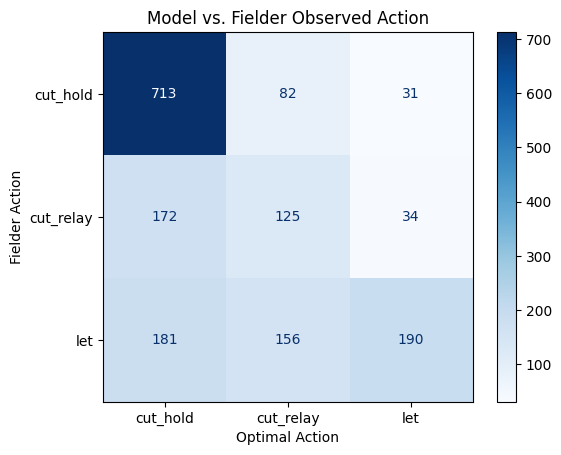

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
che = confusion_matrix(design_matrix['optimal_action'], design_matrix['cutoff_decision'], labels = ['cut_hold', 'cut_relay', 'let'])

disp = ConfusionMatrixDisplay(confusion_matrix=che, display_labels=['cut_hold', 'cut_relay', 'let'])
disp.plot(cmap='Blues')
plt.title("Model vs. Fielder Observed Action")
plt.xlabel("Optimal Action")
plt.ylabel("Fielder Action")
plt.show()

In [77]:
check = design_matrix[(design_matrix['optimal_action'] == 'cut_relay') & (design_matrix['cutoff_decision'] == 'cut and hold')]
check['diff'] = check['cut_hold'] - check['cut_relay']
#check[(check['diff'] < 0.2) & (check['diff'] > 0.1)].sort_values(by='diff', ascending=False)

In [78]:
# y2_d074.5_VZE_YJD play 76 good example of not aggressive enough 

In [79]:
speeds = pd.read_csv('runner_speeds.csv')
speeds

,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s
0,IAQ-1783,12,31.181173,30.444060
1,UEX-1111,3,30.814254,29.940639
2,IKJ-2180,9,29.627385,29.361257
3,RZQ-0385,18,30.877511,29.338936
4,XFE-2484,7,31.002160,29.190104
...,...,...,...,...
554,DMS-2354,4,22.086200,20.794230
555,XFE-1704,3,20.604365,20.465668
556,POW-2533,3,21.471650,20.105755
557,KIR-1477,3,18.968475,18.730684


In [80]:
design_full = design_matrix.merge(speeds, left_on = 'baserunner_player_id', right_on='player_id', how='left')

design_full['pct90_speed_ft_per_s'] = design_full['pct90_speed_ft_per_s'].fillna(design_full['pct90_speed_ft_per_s'].mean())

design_full['speed_plus'] = 100 * design_full['pct90_speed_ft_per_s'] / design_full['pct90_speed_ft_per_s'].mean()

design_full


,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,outs,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,speed_plus
0,y1_d001_CGA_QEA,108,4098455,CGA-1824,Home,2B,35.7615,110.5899,39.346871,41.7405,194.3859,79.266190,94.4808,338.4810,231.626499,114.200733,let,cut_relay,3.028109,3.253,3.154036,0.996948,1,CGA-1824,7.0,28.322210,27.656672,104.627624
1,y1_d001_CGA_QEA,114,4231155,CGA-1353,Home,2B,61.1802,61.2882,89.783392,25.8921,137.6235,27.986775,139.5966,299.0814,221.583436,107.931899,cut_hold,cut_hold,0.564000,0.564,0.553682,0.978368,1,CGA-1353,3.0,23.617302,22.445863,84.914673
2,y1_d001_CGA_QEA,216,8333280,CGA-1929,Home,2B,56.9868,46.3326,98.766010,11.6007,132.4140,12.801861,188.1207,245.4093,222.283963,107.931899,cut_relay,cut_hold,1.563890,1.564,1.474566,0.812507,1,CGA-1929,3.0,28.405855,27.655517,104.623255
3,y1_d002_CGA_QEA,92,3087421,QEA-0252,Home,2B,57.1884,47.2554,98.131108,-55.6794,140.5182,57.296922,-200.5506,236.1000,228.305395,94.428842,cut_relay,cut_relay,2.802150,2.809,2.261331,0.928305,0,QEA-0252,27.0,28.366512,24.333189,92.054593
4,y1_d003_CGA_QEA,92,3994106,QEA-0249,Home,2B,59.4930,72.1209,80.939068,18.4110,161.4603,39.070157,69.6903,327.1002,211.888716,99.976237,cut_hold,cut_hold,0.273000,0.273,0.261630,0.958351,2,QEA-0249,49.0,27.627580,26.671594,100.900985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,y2_d094_QZE_RZQ,344,11857564,RZQ-0310,2B,Home,-13.8180,9.9936,17.053128,2.4942,88.6911,88.726164,233.5866,234.6720,331.109721,67.227633,cut_relay,cut_hold,2.514005,2.539,2.449613,1.000000,2,RZQ-0310,87.0,30.062055,28.691501,108.542471
1680,y2_d095_QZE_RZQ,97,2945498,RZQ-0409,2B,Home,-60.0858,78.1305,98.563068,-5.2521,51.3606,51.628440,-100.2816,242.7507,262.648628,121.537404,cut_relay,cut_relay,1.648359,1.873,1.625700,0.855722,1,RZQ-0409,46.0,29.710083,28.026794,106.027829
1681,y2_d095_QZE_RZQ,97,2945498,RZQ-0409,2B,Home,-60.0858,78.1305,98.563068,-5.2521,51.3606,51.628440,-100.2816,242.7507,262.648628,121.537404,cut_relay,cut_relay,1.648359,1.873,1.625700,0.855722,2,RZQ-0409,46.0,29.710083,28.026794,106.027829
1682,y2_d095_QZE_RZQ,261,8351098,QZE-2357,2B,Home,-38.8740,30.2727,49.270927,90.5235,113.6388,145.286892,230.5521,250.0368,340.106854,107.228895,cut_hold,cut_hold,2.252996,2.253,2.247488,0.999998,1,QZE-2357,12.0,27.535706,27.071918,102.415447


In [81]:
design_full['basepath'] = design_full['from_base'] + '_to_' + design_full['to_base']

base_dummies = pd.get_dummies(design_full[['basepath']], prefix = 'is')

design_full_encoded = pd.concat([design_full, base_dummies], axis=1)
design_full_encoded


,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,outs,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,speed_plus,basepath,is_1B_to_3B,is_1B_to_Home,is_2B_to_Home,is_Home_to_2B,is_Home_to_3B
0,y1_d001_CGA_QEA,108,4098455,CGA-1824,Home,2B,35.7615,110.5899,39.346871,41.7405,194.3859,79.266190,94.4808,338.4810,231.626499,114.200733,let,cut_relay,3.028109,3.253,3.154036,0.996948,1,CGA-1824,7.0,28.322210,27.656672,104.627624,Home_to_2B,False,False,False,True,False
1,y1_d001_CGA_QEA,114,4231155,CGA-1353,Home,2B,61.1802,61.2882,89.783392,25.8921,137.6235,27.986775,139.5966,299.0814,221.583436,107.931899,cut_hold,cut_hold,0.564000,0.564,0.553682,0.978368,1,CGA-1353,3.0,23.617302,22.445863,84.914673,Home_to_2B,False,False,False,True,False
2,y1_d001_CGA_QEA,216,8333280,CGA-1929,Home,2B,56.9868,46.3326,98.766010,11.6007,132.4140,12.801861,188.1207,245.4093,222.283963,107.931899,cut_relay,cut_hold,1.563890,1.564,1.474566,0.812507,1,CGA-1929,3.0,28.405855,27.655517,104.623255,Home_to_2B,False,False,False,True,False
3,y1_d002_CGA_QEA,92,3087421,QEA-0252,Home,2B,57.1884,47.2554,98.131108,-55.6794,140.5182,57.296922,-200.5506,236.1000,228.305395,94.428842,cut_relay,cut_relay,2.802150,2.809,2.261331,0.928305,0,QEA-0252,27.0,28.366512,24.333189,92.054593,Home_to_2B,False,False,False,True,False
4,y1_d003_CGA_QEA,92,3994106,QEA-0249,Home,2B,59.4930,72.1209,80.939068,18.4110,161.4603,39.070157,69.6903,327.1002,211.888716,99.976237,cut_hold,cut_hold,0.273000,0.273,0.261630,0.958351,2,QEA-0249,49.0,27.627580,26.671594,100.900985,Home_to_2B,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,y2_d094_QZE_RZQ,344,11857564,RZQ-0310,2B,Home,-13.8180,9.9936,17.053128,2.4942,88.6911,88.726164,233.5866,234.6720,331.109721,67.227633,cut_relay,cut_hold,2.514005,2.539,2.449613,1.000000,2,RZQ-0310,87.0,30.062055,28.691501,108.542471,2B_to_Home,False,False,True,False,False
1680,y2_d095_QZE_RZQ,97,2945498,RZQ-0409,2B,Home,-60.0858,78.1305,98.563068,-5.2521,51.3606,51.628440,-100.2816,242.7507,262.648628,121.537404,cut_relay,cut_relay,1.648359,1.873,1.625700,0.855722,1,RZQ-0409,46.0,29.710083,28.026794,106.027829,2B_to_Home,False,False,True,False,False
1681,y2_d095_QZE_RZQ,97,2945498,RZQ-0409,2B,Home,-60.0858,78.1305,98.563068,-5.2521,51.3606,51.628440,-100.2816,242.7507,262.648628,121.537404,cut_relay,cut_relay,1.648359,1.873,1.625700,0.855722,2,RZQ-0409,46.0,29.710083,28.026794,106.027829,2B_to_Home,False,False,True,False,False
1682,y2_d095_QZE_RZQ,261,8351098,QZE-2357,2B,Home,-38.8740,30.2727,49.270927,90.5235,113.6388,145.286892,230.5521,250.0368,340.106854,107.228895,cut_hold,cut_hold,2.252996,2.253,2.247488,0.999998,1,QZE-2357,12.0,27.535706,27.071918,102.415447,2B_to_Home,False,False,True,False,False


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

features = ['fielder_dist_to_base', 'runner_dist_to_base', 'cutoff_dist_to_base', 
            'asplus', 'pct90_speed_ft_per_s', 'outs'] + list(base_dummies.columns)
            
label = 'optimal_action' 

X = design_full_encoded[features]
y = design_full_encoded[label]
indices = design_full_encoded.index

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, indices, test_size=0.25, stratify=y, random_state=42
)
model = RandomForestClassifier(n_estimators=50, max_depth=10, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                       random_state=42)

              precision    recall  f1-score   support

    cut_hold       0.77      0.87      0.82       206
   cut_relay       0.62      0.58      0.60        83
         let       0.77      0.65      0.70       132

    accuracy                           0.74       421
   macro avg       0.72      0.70      0.71       421
weighted avg       0.74      0.74      0.74       421



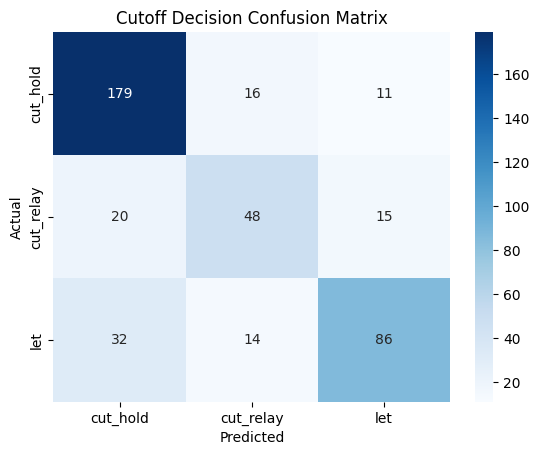

In [83]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Cutoff Decision Confusion Matrix")
plt.show()


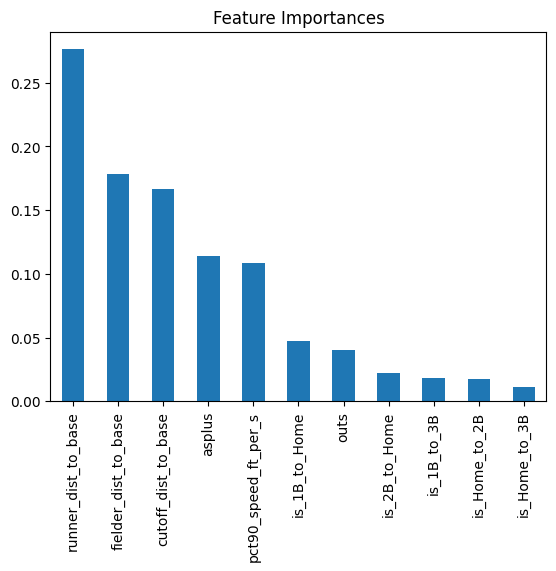

In [84]:
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)
feat_importance.plot(kind='bar', title='Feature Importances')
plt.show()


In [45]:
pd.Series(y_pred).value_counts().sort_index()

cut_hold     225
cut_relay     70
let           95
Name: count, dtype: int64

In [46]:
# with_preds = X_test.assign(pred_optimal = y_pred,
#                            optimal_action=y_test.values)
# with_preds

results_df = design_full_encoded.loc[idx_test].copy()
results_df['model_prediction'] = y_pred
results_df

,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,speed_plus,basepath,is_1B_to_3B,is_1B_to_Home,is_2B_to_Home,is_Home_to_2B,is_Home_to_3B,model_prediction
687,y1_d060_JNJ_QEA,47,1695919,JNJ-1549,1B,3B,-34.3137,108.0597,53.227264,76.3083,84.2781,141.461860,141.1491,142.0296,219.279513,107.931899,cut_hold,cut_hold,0.861023,0.873,0.861023,0.984762,JNJ-1549,4.0,28.410015,27.734064,104.939221,1B_to_3B,True,False,False,False,False,cut_hold
933,y2_d058_POW_YJD,269,9049109,POW-1711,1B,3B,-24.7014,118.3071,67.117110,-53.3172,157.7565,94.680916,-125.0454,320.0115,263.622778,117.425221,cut_relay,cut_hold,1.251050,1.253,1.174152,0.998010,POW-1711,5.0,25.346277,24.809532,93.873476,1B_to_3B,True,False,False,False,False,cut_hold
113,y1_d049_STK_QEA,209,7260828,STK-1756,Home,2B,55.9179,84.7791,70.067224,82.8615,138.9723,83.721945,193.3866,280.4877,246.894413,107.931899,cut_hold,cut_hold,2.808999,2.809,2.791470,0.981775,NaN,NaN,NaN,26.428692,100.000000,Home_to_2B,False,False,False,True,False,cut_hold
971,y2_d071_XFE_RZQ,164,5181032,XFE-2310,1B,3B,-49.0923,97.2975,36.666918,-6.5625,166.8174,117.912751,40.4169,383.4846,336.345665,113.579661,let,cut_hold,2.712956,2.809,2.792393,0.999916,XFE-2310,7.0,27.103937,26.699628,101.025157,1B_to_3B,True,False,False,False,False,let
1445,y2_d033_KNB_YJD,21,592063,KNB-1703,2B,Home,-25.1673,18.0456,30.968317,-75.0810,149.8074,167.569131,-117.0711,323.9253,344.431767,117.425221,cut_hold,cut_hold,3.806172,3.809,3.773351,1.000000,KNB-1703,7.0,26.718086,26.141048,98.911620,2B_to_Home,False,False,True,False,False,cut_hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,y1_d078_GAX_YJD,73,2360568,GAX-2264,1B,3B,-11.1447,124.7271,80.544338,-57.6231,65.3814,6.263829,-211.3464,216.6504,212.671961,117.425221,cut_relay,cut_hold,1.691690,1.809,1.542337,0.905775,NaN,NaN,NaN,26.428692,100.000000,1B_to_3B,True,False,False,False,False,cut_relay
877,y2_d034_KNB_YJD,305,10925125,YJD-0278,1B,3B,-29.5248,115.1667,61.796826,-3.3081,138.9633,96.506672,15.3051,246.9165,199.556018,100.957829,cut_hold,cut_hold,1.274671,1.288,1.274671,0.987330,YJD-0278,53.0,28.474552,25.855217,97.830102,1B_to_3B,True,False,False,False,False,cut_hold
1300,y1_d064_IAQ_YJD,214,1352616,IAQ-2453,2B,Home,-59.9274,58.9134,84.036194,-13.3863,133.2108,133.881703,46.8045,244.9614,249.392760,113.036169,cut_hold,cut_hold,1.204230,1.236,1.236000,0.972350,IAQ-2453,11.0,26.897876,24.204111,91.582702,2B_to_Home,False,False,True,False,False,cut_hold
147,y1_d056_WZR_YJD,36,1039007,YJD-0340,Home,2B,-27.9693,116.8182,29.764926,-84.9630,162.0057,91.891841,-122.6220,263.1801,183.251670,82.739444,cut_hold,cut_hold,3.252197,3.253,3.248866,0.999076,YJD-0340,58.0,28.217348,26.748809,101.211246,Home_to_2B,False,False,False,True,False,cut_hold


In [47]:
# design_full_encoded['model_prediction'] = model.predict(design_full_encoded[features])

# design_full_encoded


In [48]:
# checker = design_full_encoded[['game_str', 'play_id', 'baserunner_player_id', 'from_base', 'to_base', 'optimal_action', 'cutoff_decision', 'model_prediction']]
# checker['match'] = checker['optimal_action'] == checker['model_prediction']

# checker[checker['optimal_action'] == '']

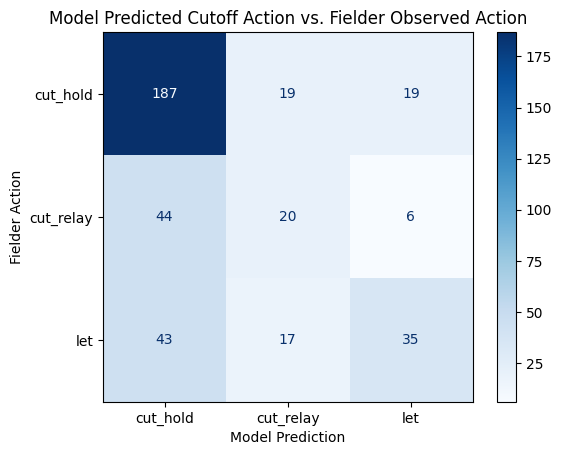

In [85]:
cm = confusion_matrix(results_df['model_prediction'], results_df['cutoff_decision'], labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Model Predicted Cutoff Action vs. Fielder Observed Action")
plt.xlabel("Model Prediction")
plt.ylabel("Fielder Action")
plt.show()

In [86]:
results_df[(results_df['model_prediction'] == 'cut_hold') & (results_df['cutoff_decision'] == 'let')].sort_values('safe_probability')

,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,speed_plus,basepath,is_1B_to_3B,is_1B_to_Home,is_2B_to_Home,is_Home_to_2B,is_Home_to_3B,model_prediction
103,y1_d048_STK_QEA,118,3836605,STK-1713,Home,2B,55.1898,43.4733,100.113054,57.6396,122.3472,57.827087,211.9938,246.4656,243.338038,107.931899,cut_relay,let,2.777667,2.809,2.623909,0.804733,STK-1713,5.0,27.502505,27.233820,103.046415,Home_to_2B,False,False,False,True,False,cut_hold
555,y1_d006_JJS_YJD,163,5334253,JJS-2128,1B,3B,-21.8871,125.7783,74.863028,0.3216,-5.0157,93.833317,-176.7309,174.6540,158.472899,117.425221,let,let,0.739143,2.253,2.002325,0.816965,NaN,NaN,NaN,26.428692,100.000000,1B_to_3B,True,False,False,False,False,cut_hold
1430,y2_d028_VMN_YJD,52,1416008,VMN-2162,2B,Home,-60.1581,63.2184,87.267194,1.1355,1.1178,1.593373,-94.9524,227.5293,246.547238,117.425221,let,let,1.437536,1.503,1.503000,0.948332,VMN-2162,3.0,26.810720,26.065258,98.624850,2B_to_Home,False,False,True,False,False,cut_hold
1284,y1_d057_OXG_QEA,146,4096327,NaN,2B,Home,-61.0764,62.6331,87.482752,0.0693,2.0502,2.051371,-38.6475,247.5033,250.502520,126.292996,cut_relay,let,2.223539,2.288,2.222693,0.954444,NaN,NaN,NaN,26.428692,100.000000,2B_to_Home,False,False,True,False,False,cut_hold
1312,y1_d067_OWH_QEA,13,317715,OWH-1836,2B,Home,-61.6950,62.9754,88.159934,0.1461,0.2184,0.262762,14.6274,256.8618,257.277953,114.200733,cut_relay,let,2.030889,2.089,2.016181,0.961894,OWH-1836,12.0,26.364807,25.762479,97.479205,2B_to_Home,False,False,True,False,False,cut_hold
471,y2_d083_WMI_YJD,231,7339750,WMI-1853,Home,2B,56.9763,75.0417,77.110075,1.8420,1.3089,125.704597,112.5456,179.9463,124.377742,110.154348,cut_hold,let,1.528543,1.564,1.555245,0.981646,NaN,NaN,NaN,26.428692,100.000000,Home_to_2B,False,False,False,True,False,cut_hold
1489,y2_d063_KIR_RZQ,133,4311737,KIR-1250,2B,Home,-60.3822,62.9556,87.231976,1.6239,-1.2144,2.027762,11.1621,279.8712,280.093701,113.579661,cut_hold,let,1.221461,1.236,1.236000,0.987346,KIR-1250,4.0,26.190027,25.344064,95.896018,2B_to_Home,False,False,True,False,False,cut_hold
388,y2_d050_DYE_RZQ,146,5040058,RZQ-0205,Home,2B,47.7231,96.2463,56.773976,-47.1924,157.7388,56.320480,-85.8999,299.4507,192.660418,105.936241,let,let,2.009845,2.253,2.241067,0.990040,RZQ-0205,11.0,29.668527,27.880662,105.493916,Home_to_2B,False,False,False,True,False,cut_hold
116,y1_d050_JZK_RZQ,89,2956446,RZQ-0355,Home,2B,46.6557,102.1593,52.856548,-98.9040,118.4553,99.272419,-201.6417,229.3542,226.132168,107.280583,cut_hold,let,1.805296,1.809,1.798646,0.992885,RZQ-0355,118.0,28.548479,27.289534,103.257223,Home_to_2B,False,False,False,True,False,cut_hold
742,y1_d083_YJD_RZQ,302,6011553,RZQ-0347,1B,3B,-52.4061,94.9635,33.277052,-86.4384,130.1907,70.347443,-169.6149,247.9254,212.583603,117.425221,let,let,2.407499,2.809,2.724457,0.996702,RZQ-0347,139.0,29.131157,27.983361,105.882503,1B_to_3B,True,False,False,False,False,cut_hold


In [87]:
# y1_d014_IXC_QEA play 45 ideal example of why to cut

In [88]:
design_full[design_full['game_str'] == 'y1_d014_IXC_QEA'].loc[design_full['play_id'] == 45]

,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,outs,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,speed_plus,basepath
26,y1_d014_IXC_QEA,45,1526967,QEA-0364,Home,2B,27.0531,23.1390,107.326500,2.2404,-2.1105,129.129937,0.7059,277.2552,150.256858,92.99291,let,let,1.162202,1.273,1.224355,0.821813,2,QEA-0364,25.0,26.970532,26.444167,100.040611,Home_to_2B
1291,y1_d014_IXC_QEA,45,1526967,QEA-0180,2B,Home,-51.4158,84.6534,99.044347,2.2404,-2.1105,3.077922,0.7059,277.2552,277.256099,92.99291,let,let,1.162202,1.273,1.224355,0.912963,2,QEA-0180,28.0,27.633565,24.466263,92.558025,2B_to_Home


/Users/pranavrajaram/Library/Python/3.10/lib/python/site-packages/xgboost/training.py:183: UserWarning: [20:58:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

    cut_hold       0.78      0.89      0.83       206
   cut_relay       0.68      0.54      0.60        83
         let       0.76      0.68      0.72       132

    accuracy                           0.76       421
   macro avg       0.74      0.70      0.72       421
weighted avg       0.75      0.76      0.75       421



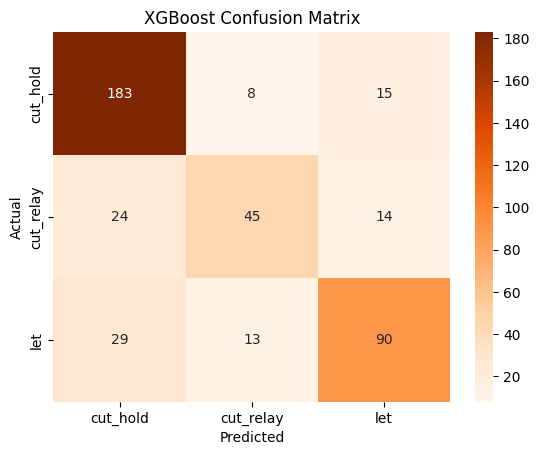

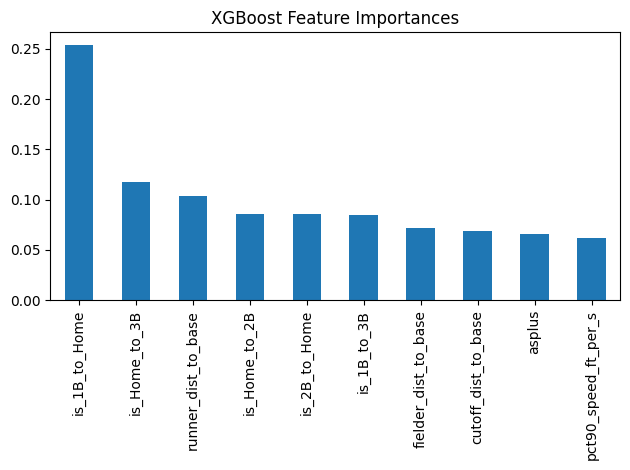

In [89]:
# XGBoost model
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

xgbv_features = ['fielder_dist_to_base', 'runner_dist_to_base', 'cutoff_dist_to_base', 
                 'asplus', 'pct90_speed_ft_per_s'] + list(base_dummies.columns)
xgbv_label = 'optimal_action'

X_xgbv = design_full_encoded[xgbv_features]
y_xgbv = design_full_encoded[xgbv_label]
indices_xgbv = design_full_encoded.index

xgbv_le = LabelEncoder()
y_xgbv_encoded = xgbv_le.fit_transform(y_xgbv)

X_xgbv_train, X_xgbv_test, y_xgbv_train, y_xgbv_test, idx_xgbv_train, idx_xgbv_test = train_test_split(
    X_xgbv, y_xgbv_encoded, indices_xgbv, test_size=0.25, stratify=y_xgbv_encoded, random_state=42
)

xgbv_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgbv_model.fit(X_xgbv_train, y_xgbv_train)

y_xgbv_pred = xgbv_model.predict(X_xgbv_test)

y_xgbv_pred_labels = xgbv_le.inverse_transform(y_xgbv_pred)
y_xgbv_test_labels = xgbv_le.inverse_transform(y_xgbv_test)

print(classification_report(y_xgbv_test_labels, y_xgbv_pred_labels))

cm_xgbv = confusion_matrix(y_xgbv_test_labels, y_xgbv_pred_labels, labels=xgbv_le.classes_)
sns.heatmap(cm_xgbv, annot=True, fmt='d', cmap='Oranges',
            xticklabels=xgbv_le.classes_, yticklabels=xgbv_le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

xgbv_importances = pd.Series(xgbv_model.feature_importances_, index=xgbv_features).sort_values(ascending=False)
xgbv_importances.plot(kind='bar', title='XGBoost Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
xgbv_results_df = design_full_encoded.loc[idx_xgbv_test].copy()
xgbv_results_df['xgbv_model_prediction'] = y_xgbv_pred_labels
xgbv_results_df


,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,speed_plus,basepath,is_1B_to_3B,is_1B_to_Home,is_2B_to_Home,is_Home_to_2B,is_Home_to_3B,xgbv_model_prediction
989,y2_d077_MGJ_RZQ,179,5688240,RZQ-0279,1B,3B,-14.5089,124.4265,78.159219,86.1390,132.5724,164.880031,224.5623,235.1907,335.395600,96.214567,cut_hold,cut_hold,1.538809,1.539,1.518690,0.996898,RZQ-0279,39.0,27.658460,26.241033,99.289940,1B_to_3B,True,False,False,False,False,cut_hold
1374,y1_d099_MRJ_YJD,121,4208767,YJD-0284,2B,Home,-52.8507,82.2723,97.785111,-0.0411,-0.6588,0.660081,147.1152,235.9113,278.023423,105.268037,cut_relay,let,2.130537,2.253,2.001989,0.928551,YJD-0284,27.0,28.816289,27.803499,105.201948,2B_to_Home,False,False,True,False,False,let
1232,y1_d045_MHY_RZQ,125,4247660,MHY-2352,2B,Home,-60.5577,64.2348,88.279922,-0.4755,128.0796,128.080483,140.4732,226.0098,266.107402,107.228895,cut_hold,cut_hold,1.205221,1.236,1.236000,0.973212,MHY-2352,10.0,27.053057,24.933218,94.341475,2B_to_Home,False,False,True,False,False,cut_hold
1355,y1_d091_DYE_RZQ,270,9237901,RZQ-0274,2B,Home,-30.2964,17.4153,34.945165,-33.9729,160.7709,164.321150,-78.6243,362.8065,371.228147,105.936241,let,cut_hold,3.668443,3.809,3.783104,1.000000,RZQ-0274,76.0,28.712933,27.011267,102.204327,2B_to_Home,False,False,True,False,False,let
1269,y1_d051_UPU_YJD,322,10474492,UPU-2411,2B,Home,-31.5735,21.8697,38.407938,-63.8340,105.2067,123.057829,-146.0895,154.2327,212.437915,117.425221,cut_hold,cut_hold,1.502880,1.503,1.503000,0.999905,NaN,NaN,NaN,26.428692,100.000000,2B_to_Home,False,False,True,False,False,cut_hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,y2_d058_POW_YJD,269,9049109,POW-1711,1B,3B,-24.7014,118.3071,67.117110,-53.3172,157.7565,94.680916,-125.0454,320.0115,263.622778,117.425221,cut_relay,cut_hold,1.253000,1.253,1.174152,0.998010,POW-1711,5.0,25.346277,24.809532,93.873476,1B_to_3B,True,False,False,False,False,cut_hold
202,y1_d070_ACN_QEA,282,9456337,QEA-0277,Home,2B,58.3890,77.9652,76.247537,-45.8124,158.8815,55.814031,-90.0813,336.5508,228.092478,83.306199,cut_hold,cut_hold,2.088999,2.089,2.078553,0.987753,QEA-0277,10.0,24.567446,23.645432,89.468792,Home_to_2B,False,False,False,True,False,cut_hold
1312,y1_d067_OWH_QEA,13,317715,OWH-1836,2B,Home,-61.6950,62.9754,88.159934,0.1461,0.2184,0.262762,14.6274,256.8618,257.277953,114.200733,cut_hold,let,1.514806,1.564,1.523279,0.961894,OWH-1836,12.0,26.364807,25.762479,97.479205,2B_to_Home,False,False,True,False,False,let
1210,y1_d026_JIL_RZQ,33,937665,RZQ-0244,2B,Home,-57.4566,76.3932,95.588608,-61.8840,79.0323,100.377955,85.3290,290.2278,302.511511,111.474354,cut_hold,cut_hold,1.291404,1.316,1.303453,0.981310,RZQ-0244,11.0,28.952934,28.538231,107.982000,2B_to_Home,False,False,True,False,False,cut_relay


In [57]:
design_full_encoded[(design_full_encoded['cutoff_decision'] == 'cut_hold') & (design_full_encoded['optimal_action'] == 'let')]

,game_str,play_id,timestamp,baserunner_player_id,from_base,to_base,runner_x,runner_y,runner_dist_to_base,cutoff_x,cutoff_y,cutoff_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,asplus,optimal_action,cutoff_decision,let,cut_hold,cut_relay,safe_probability,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,speed_plus,basepath,is_1B_to_3B,is_1B_to_Home,is_2B_to_Home,is_Home_to_2B,is_Home_to_3B
17,y1_d007_JJS_YJD,179,6122609,YJD-0223,Home,2B,57.4989,48.6741,97.165169,-35.6601,26.9427,106.221966,91.0401,308.8788,203.391735,108.198756,let,cut_hold,1.291927,2.253,2.176557,0.934405,YJD-0223,39.0,26.820609,24.579028,93.001303,Home_to_2B,False,False,False,True,False
19,y1_d009_GEA_YJD,44,1475141,YJD-0066,Home,2B,52.9182,92.4573,63.194414,-112.9785,120.4122,113.170405,-223.5621,215.9244,240.598341,101.589159,let,cut_hold,2.686893,2.809,2.795461,0.985725,YJD-0066,8.0,30.265439,26.931879,101.903941,Home_to_2B,False,False,False,True,False
88,y1_d046_MHY_RZQ,111,3529619,RZQ-0239,Home,2B,59.0736,77.6067,77.002521,-1.5282,132.9489,6.142052,-102.5790,300.0747,201.189719,100.557242,let,cut_hold,2.580854,2.809,2.790110,0.981421,RZQ-0239,15.0,27.901534,25.131318,95.091037,Home_to_2B,False,False,False,True,False
99,y1_d048_MHY_RZQ,68,2454456,MHY-1021,Home,2B,-13.2456,126.1056,13.275763,-69.9894,67.7778,91.683069,-22.1409,300.7275,175.132703,113.579661,let,cut_hold,2.727017,2.809,2.803102,0.999762,MHY-1021,6.0,26.616297,26.401160,99.895826,Home_to_2B,False,False,False,True,False
106,y1_d048_UPU_YJD,74,2408875,YJD-0166,Home,2B,49.5537,101.3262,55.809616,-105.5691,129.6273,105.601788,-203.7414,258.4548,242.468395,109.059118,let,cut_hold,3.132929,3.253,3.246891,0.993867,YJD-0166,41.0,27.532369,25.945734,98.172600,Home_to_2B,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,y2_d065_ESW_YJD,42,1199387,ESW-2445,2B,Home,-60.2043,65.0337,88.622457,-48.8472,66.2391,82.302292,-90.2073,213.5397,231.811476,117.425221,let,cut_hold,1.104655,1.236,1.236000,0.885688,ESW-2445,9.0,28.892504,28.405354,107.479226,2B_to_Home,False,False,True,False,False
1544,y2_d088_DYE_RZQ,156,4732813,DYE-0311,2B,Home,-56.2077,87.5139,104.009558,-54.5988,132.2454,143.072970,-143.9400,261.6204,298.603344,114.575769,let,cut_hold,1.403108,1.503,1.503000,0.921158,NaN,NaN,NaN,26.428692,100.000000,2B_to_Home,False,False,True,False,False
1547,y2_d091_NYA_YJD,47,1418522,YJD-0312,2B,Home,-60.2319,58.8726,84.225084,-61.4241,81.7476,102.252580,144.4098,148.9341,207.450130,101.056536,let,cut_hold,1.060017,1.236,1.236000,0.846839,YJD-0312,60.0,30.123803,27.954081,105.771714,2B_to_Home,False,False,True,False,False
1550,y2_d094_QZE_RZQ,135,4505064,QZE-2357,2B,Home,-47.4537,88.7517,100.641532,-43.7415,141.6195,148.220787,-66.2292,276.5031,284.324236,114.575769,let,cut_hold,1.138845,1.236,1.236000,0.915443,QZE-2357,12.0,27.535706,27.071918,102.433816,2B_to_Home,False,False,True,False,False


In [ ]:
everything_df[(everything_df['cutoff_decision'] == 'cut_hold') & (everything_df['optimal_action'] == 'let') &
              (everything_df['first_baserunner'].notna()) & (everything_df['second_baserunner'].notna())]

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,outs,let,cut_hold,cut_relay,optimal_action,cutoff_man,cutoff_decision,cutoff_x,cutoff_y,cut_code,cutoff_dist_to_base
106,y1_d048_UPU_YJD,74,2408875,7,left field,ball acquired,YJD,UPU,bottom,UPU-1042,UPU-1647,UPU-2411,UPU-1344,UPU-2017,UPU-2263,UPU-1270,UPU-1095,UPU-1731,YJD-0166,YJD-0345,YJD-0020,YJD-0172,-203.7414,258.4548,-68.3805,296.5653,120.8775,226.9848,49.5537,101.3262,-61.4892,78.1923,-36.8766,30.4917,-202.1301,256.4922,0.000000,0.098804,109.059118,10,Home,2B,True,True,49.5537,101.3262,55.809616,-203.7414,258.4548,242.468395,YJD-0166,YJD-0166,41.0,27.532369,25.945734,0.993867,1,3.132929,3.253,3.246891,let,shortstop,cut_hold,-105.5691,129.6273,6,105.601788
142,y1_d054_APZ_QEA,163,5642129,7,left field,ball acquired,QEA,APZ,top,QEA-0410,QEA-0120,QEA-0180,QEA-0365,QEA-0369,QEA-0027,QEA-0235,QEA-0424,QEA-0252,APZ-1778,APZ-1755,APZ-1184,NaN,-115.0806,314.8017,-91.4688,331.5525,121.4601,256.5555,59.8098,63.8523,-12.3786,122.4855,-47.3916,90.6426,-117.7608,317.1930,-1.613010,0.098359,108.568046,10,Home,2B,True,True,59.8098,63.8523,86.976113,-115.0806,314.8017,220.256721,APZ-1778,APZ-1778,9.0,24.815774,24.735861,0.963855,1,2.462679,3.253,3.204441,let,shortstop,cut_hold,-49.3695,160.5273,6,59.677696
177,y1_d063_HCI_RZQ,105,3510607,8,center field,ball acquired,RZQ,HCI,bottom,HCI-1696,HCI-2090,HCI-1323,HCI-2077,HCI-2098,HCI-1491,HCI-2523,HCI-1255,HCI-1436,RZQ-0169,RZQ-0214,RZQ-0355,RZQ-0333,-85.6089,210.0702,125.1714,327.6351,101.1021,328.8096,49.6812,94.7007,-57.5127,84.0630,-21.6018,16.9032,125.3964,327.6420,0.000000,0.084969,94.559005,10,Home,2B,True,True,49.6812,94.7007,59.257627,125.1714,327.6351,236.479011,RZQ-0169,RZQ-0169,44.0,26.559551,25.013678,0.994294,1,3.150772,3.253,3.247636,let,shortstop,cut_hold,-2.9892,133.1991,6,6.882162
230,y1_d081_FBP_QEA,68,2072269,7,left field,ball acquired,QEA,FBP,top,QEA-0394,QEA-0218,QEA-0263,QEA-0365,QEA-0277,QEA-0027,QEA-0364,QEA-0421,QEA-0249,FBP-1154,FBP-1349,FBP-1347,NaN,-188.4951,160.8264,-18.7872,288.5106,123.7713,235.0899,20.3730,119.5347,-60.3201,69.5310,-13.6434,8.3601,-187.4823,160.6293,-0.702891,0.098359,108.568046,10,Home,2B,True,True,20.3730,119.5347,21.697692,-188.4951,160.8264,191.506209,FBP-1154,FBP-1154,9.0,26.786729,26.352305,0.999535,0,3.571018,3.809,3.807341,let,shortstop,cut_hold,-87.3048,98.0970,6,91.964730
397,y2_d054_PTB_YJD,185,5752730,8,center field,ball acquired,YJD,PTB,bottom,PTB-2119,PTB-2064,PTB-2163,PTB-1234,PTB-1099,PTB-1363,PTB-1274,PTB-1280,PTB-1440,YJD-0174,YJD-0185,YJD-0278,NaN,-91.1934,319.5030,-68.6424,377.8176,110.1714,220.4286,54.3300,92.8062,-54.1491,91.5228,-19.0251,7.7784,-68.3358,379.0170,0.000000,0.079203,88.141924,10,Home,2B,True,True,54.3300,92.8062,64.194742,-68.6424,377.8176,260.040857,YJD-0174,YJD-0174,50.0,28.324917,24.806165,0.991566,2,2.463564,2.539,2.534420,let,shortstop,cut_hold,-45.5562,186.2136,6,74.710225
637,y1_d048_UPU_YJD,74,2408875,7,left field,ball acquired,YJD,UPU,bottom,UPU-1042,UPU-1647,UPU-2411,UPU-1344,UPU-2017,UPU-2263,UPU-1270,UPU-1095,UPU-1731,YJD-0166,YJD-0345,YJD-0020,YJD-0172,-203.7414,258.4548,-68.3805,296.5653,120.8775,226.9848,49.5537,101.3262,-61.4892,78.1923,-36.8766,30.4917,-202.1301,256.4922,0.000000,0.098804,109.059118,11,1B,3B,True,True,-61.4892,78.1923,14.710383,-203.7414,258.4548,239.960848,YJD-0345,YJD-0345,141.0,30.291783,28.293359,0.999628

In [ ]:
everything_df.to_csv('everything_df.csv', index=False)